<a href="https://colab.research.google.com/github/lucazappaterra/PhysLab-II---CYGNO/blob/main/PMT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and enviroment preparation

In [2]:
!pip install lecroyparser

In [3]:
import lecroyparser
import matplotlib.pyplot as plt
import os
import numpy as np

!wget -q https://media.giphy.com/media/yJFeycRK2DB4c/giphy.gif 
from IPython.display import Image

#!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/PMT_data_31-03/pmt-1648-dark.zip
#!unzip pmt-1648-dark.zip 

#!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/PMT_data_31-03/pmt-1648-spe.zip
#!unzip pmt-1648-spe.zip

In [4]:
# imo it could be smarter to import all data at once, it's just some Mb
!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/Data.zip 
!unzip -q Data.zip # -q flag stands for 'quiet'

--2022-04-16 09:00:09--  https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/Data.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/Data.zip [following]
--2022-04-16 09:00:09--  https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13365337 (13M) [application/zip]
Saving to: ‘Data.zip’

Data.zip            100%[===================>]  12.75M  --.-KB/s    in 0.1s    

2022-04-16 09:00:10 (117 MB/s) - ‘Data.zip’ saved [13365337/13365337]



# 31/03 Data

In [ ]:
# dark current data path
path_dark='Data/20220331-PMT/pmt-1648/1648-dark/'
files_dark = os.listdir(path_dark)

# single (?) photoelectron current data path
path_spe='Data/20220331-PMT/pmt-1648/1648-spe/'
files_spe = os.listdir(path_spe)

# impulsator data paths
path_imp7='Data/20220331-PMT/pmt-1648/1648-imp7/'
files_imp7 = os.listdir(path_imp7)

path_imp75='Data/20220331-PMT/pmt-1648/1648-imp7.5/'
files_imp75 = os.listdir(path_imp75)

path_imp8='Data/20220331-PMT/pmt-1648/1648-imp8/'
files_imp8 = os.listdir(path_imp8)

No DS_Store!


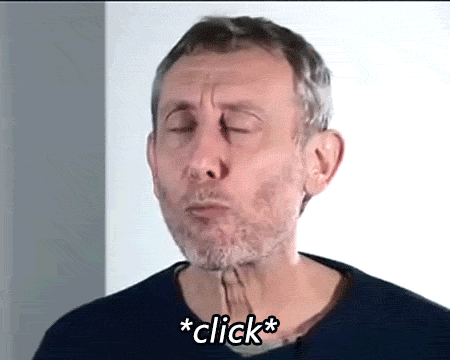

In [ ]:
if not ((files_dark=='.DS_Store')&(files_spe=='.DS_Store')&(files_imp7=='.DS_Store')&(files_imp75=='.DS_Store')&(files_imp8=='.DS_Store')): 
    with open('giphy.gif','rb') as f:
        print('No DS_Store!')
        display(Image(data=f.read(), format='png'))

## Dark Current Visualization

In [ ]:
from scipy import signal
import numpy as np
peaks = np.zeros(len(files_dark))
peakpos = np.zeros(len(files_dark))
usample=0
t_dark = np.zeros(shape=(len(files_dark), 252))
v_dark = np.zeros(shape=(len(files_dark), 252))
for i,filename in enumerate(files_dark):
    #print(i,filename)
    f = open(path_dark+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                   # we can't go further than the "WaveArrayCount"
    t_dark[i] = data.x
    v_dark[i] = data.y
    #print(t[i])
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

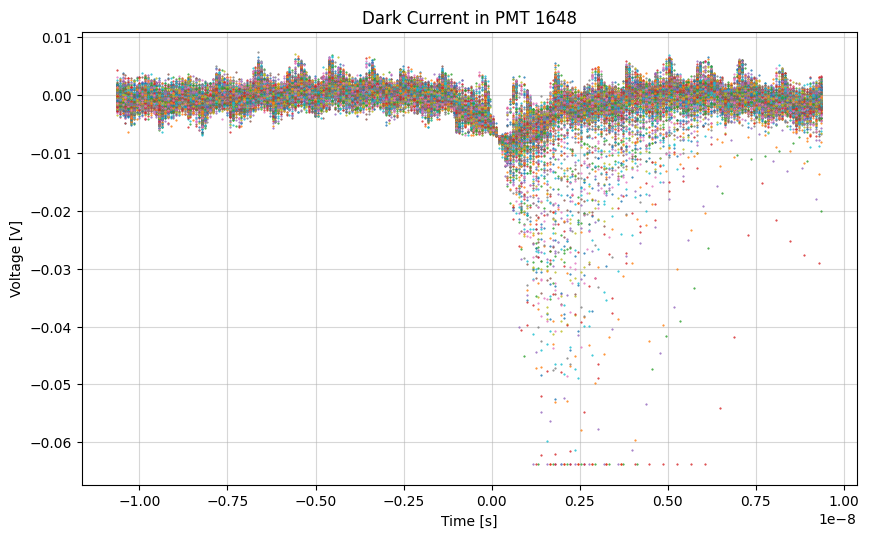

In [ ]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Dark Current in PMT 1648')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_dark):
    plt.plot(t_dark[k][80:130], v_dark[k][80:130], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)


## Single (?) Photoelectron Current Visualization

In [ ]:
usample=0
peaks = np.zeros(len(files_spe))
peakpos = np.zeros(len(files_spe))
t_spe = np.zeros(shape=(len(files_spe), 127))
v_spe = np.zeros(shape=(len(files_spe), 127))
for i,filename in enumerate(files_spe):
    #print(i,filename)
    f = open(path_spe+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                   # we can't go further than the "WaveArrayCount"
    t_spe[i] = data.x
    v_spe[i] = data.y

    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

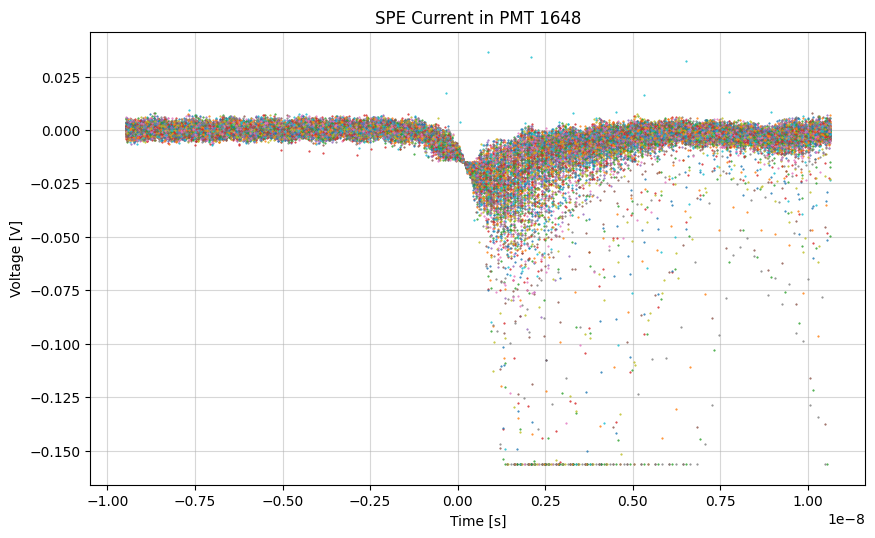

In [ ]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('SPE Current in PMT 1648')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_dark):
    plt.plot(t_spe[k][30:80], v_spe[k][30:80], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

## Impulsator Data

### Intensity: 7

In [ ]:
usample=0
peaks = np.zeros(len(files_imp7))
peakpos = np.zeros(len(files_imp7))
t_imp7 = np.zeros(shape=(len(files_imp7), 502))
v_imp7 = np.zeros(shape=(len(files_imp7), 502))
for i,filename in enumerate(files_imp7):
    #print(i,filename)
    f = open(path_imp7+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                   # we can't go further than the "WaveArrayCount"
    t_imp7[i] = data.x
    v_imp7[i] = data.y
    
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

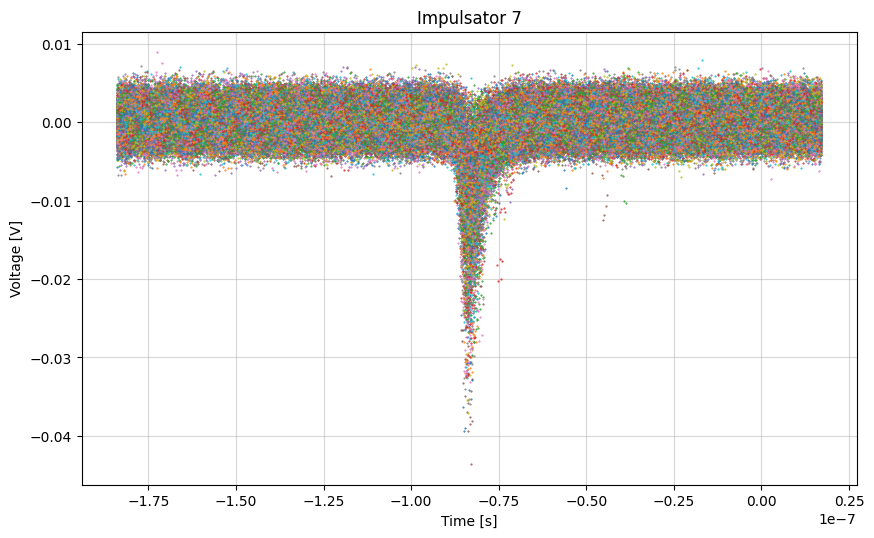

In [ ]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Impulsator 7')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_imp7):
    plt.plot(t_imp7[k], v_imp7[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

### Intensity: 7.5

In [ ]:
usample=0
peaks = np.zeros(len(files_imp75))
peakpos = np.zeros(len(files_imp75))
t_imp75 = np.zeros(shape=(len(files_imp75), 502))
v_imp75 = np.zeros(shape=(len(files_imp75), 502))
for i,filename in enumerate(files_imp75):
    #print(i,filename)
    f = open(path_imp75+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp75[i] = data.x
    v_imp75[i] = data.y
    
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

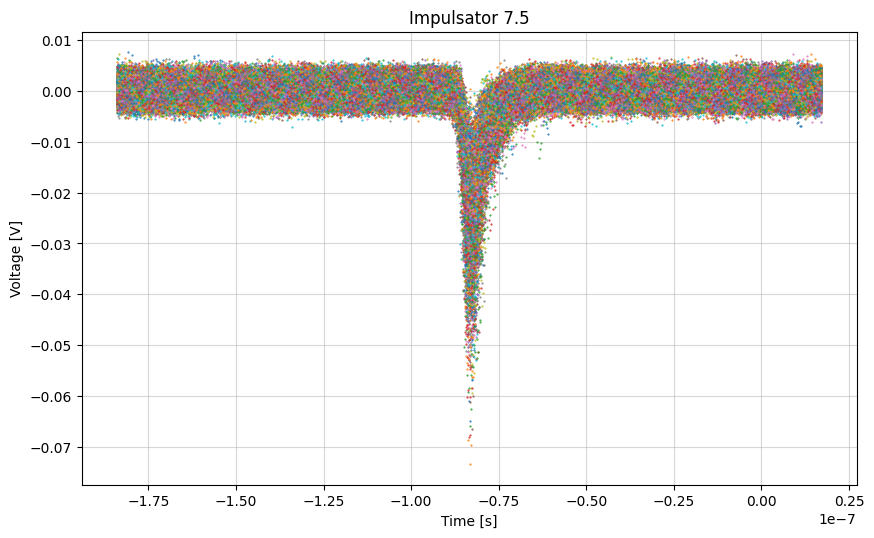

In [ ]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Impulsator 7.5')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_imp75):
    plt.plot(t_imp75[k], v_imp75[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

### Intensity: 8

In [ ]:
usample=0
peaks = np.zeros(len(files_imp8))
peakpos = np.zeros(len(files_imp8))
t_imp8 = np.zeros(shape=(len(files_imp8), 502))
v_imp8 = np.zeros(shape=(len(files_imp8), 502))
for i,filename in enumerate(files_imp8):
    #print(i,filename)
    f = open(path_imp8+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp8[i] = data.x
    v_imp8[i] = data.y
    
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

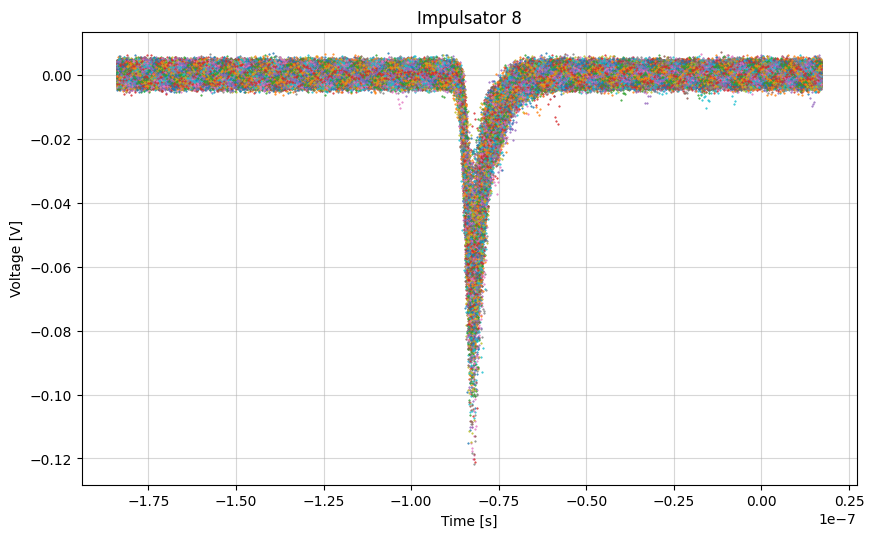

In [ ]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Impulsator 8')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_imp8):
    plt.plot(t_imp8[k], v_imp8[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

# 05/04 Data

In [5]:
# impulsator data paths
path_imp0='Data/20220405-PMT/pmt-1648/1648-imp0/'
files_imp0 = os.listdir(path_imp0)

path_imp2='Data/20220405-PMT/pmt-1648/1648-imp2/'
files_imp2 = os.listdir(path_imp2)

path_imp3='Data/20220405-PMT/pmt-1648/1648-imp3/'
files_imp3 = os.listdir(path_imp3)

path_imp4='Data/20220405-PMT/pmt-1648/1648-imp4/'
files_imp4 = os.listdir(path_imp4)

path_imp45='Data/20220405-PMT/pmt-1648/1648-imp4.5/'
files_imp45 = os.listdir(path_imp45)

path_imp5='Data/20220405-PMT/pmt-1648/1648-imp5/'
files_imp5 = os.listdir(path_imp5)

path_imp55='Data/20220405-PMT/pmt-1648/1648-imp5.5/'
files_imp55 = os.listdir(path_imp55)

path_imp6='Data/20220405-PMT/pmt-1648/1648-imp6/'
files_imp6 = os.listdir(path_imp6)

path_imp65='Data/20220405-PMT/pmt-1648/1648-imp6.5/'
files_imp65 = os.listdir(path_imp65)

No DS_Store!


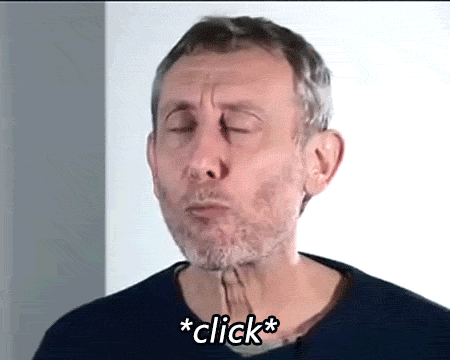

In [6]:
files = {0: files_imp0, 2: files_imp2, 3: files_imp3, 4: files_imp4, 45: files_imp45, 5: files_imp5, 55: files_imp55, 6: files_imp6, 65: files_imp65}
paths = {0: path_imp0, 2: path_imp2, 3: path_imp3, 4: path_imp4, 45: path_imp45, 5: path_imp5, 55: path_imp55, 6: path_imp6, 65: path_imp65}
flag = 0
for i in files:
    if (files=='.DS_Store'): flag+=1

if flag==0 :
    with open('giphy.gif','rb') as f:
        print('No DS_Store!')
        display(Image(data=f.read(), format='png'))
else: print(f"Oh no! i found {flag} DS_Store(s)")

### Intensity: 0

In [ ]:
usample=0
peaks = np.zeros(len(files_imp0))
peakpos = np.zeros(len(files_imp0))
t_imp0 = np.zeros(shape=(len(files_imp0), 502))
v_imp0 = np.zeros(shape=(len(files_imp0), 502))
for i,filename in enumerate(files_imp0):
    #print(i,filename)
    f = open(path_imp0+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp0[i] = data.x
    v_imp0[i] = data.y
  
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

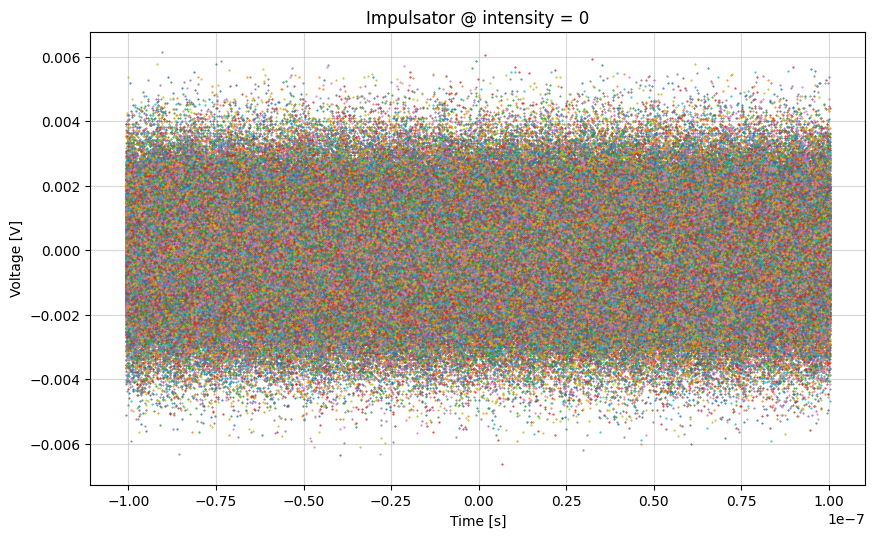

In [ ]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Impulsator @ intensity = 0')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_imp0):
    plt.plot(t_imp0[k], v_imp0[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

### Intensity at request

which intensity would you like me to show? 
 Write a number: 
3


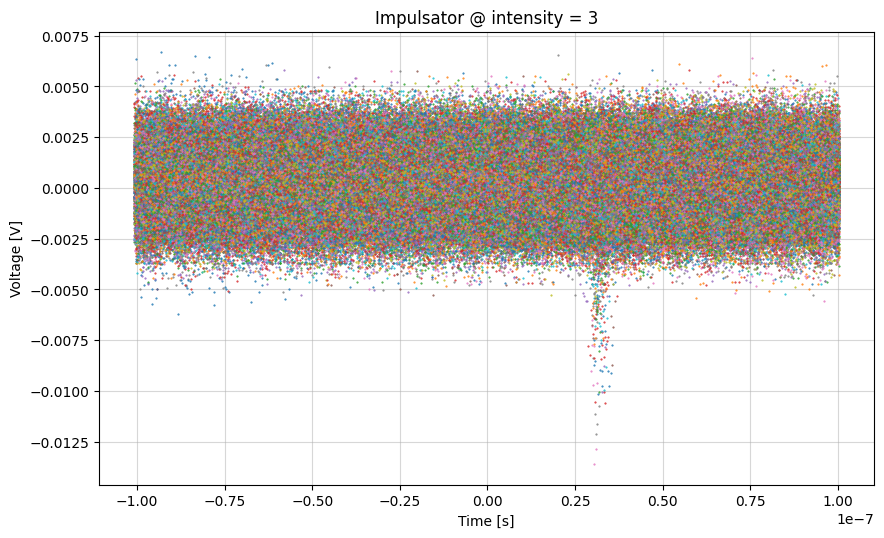

In [7]:
print('which intensity would you like me to show? \n Write a number: ')
a = int(input())
#files_imp = f'files_imp_{a}'
#path_imp = f'path_imp_{a}'
#print(files_imp, path_imp)
usample=0
#peaks = np.zeros(len(files[a]))
#peakpos = np.zeros(len(files[a]))
t_imp = np.zeros(shape=(len(files[a]), 502))
v_imp = np.zeros(shape=(len(files[a]), 502))
for i,filename in enumerate(files[a]):
    #print(i,filename)
    f = open(paths[a]+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp[i] = data.x
    v_imp[i] = data.y

    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

plt.figure(figsize=(10,6), dpi=100)
plt.title(f'Impulsator @ intensity = {a}')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files[a]):
    plt.plot(t_imp[k], v_imp[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

## Analisi del rumore

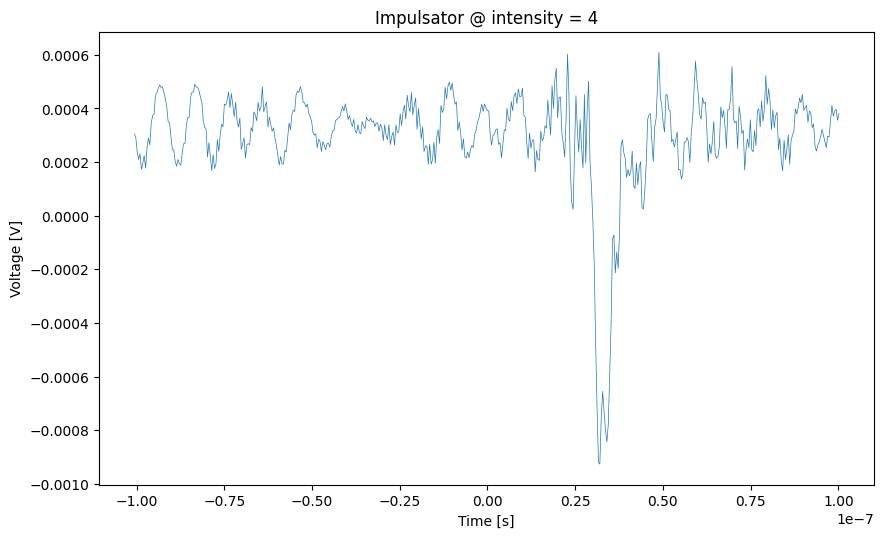

0.0002958695419106768 0.00019327003012030165
5.941060480888058e-11 1.9621633606502776e-11


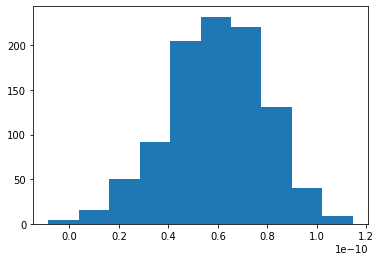

In [ ]:
t=np.zeros(len(t_imp[0]))
v=np.zeros(len(t_imp[0]))
charge = np.zeros(len(t_imp[:,0]))
delta = (np.max(t_imp[0])-np.min(t_imp[0]))/len(t_imp[0])

for i in range(len(t_imp[:,0])):
  t+=t_imp[i]/len(t_imp[:,0])
  v+=v_imp[i]/len(t_imp[:,0])
  charge[i] = np.sum(v_imp[i])*delta



plt.figure(figsize=(10,6), dpi=100)
plt.title(f'Impulsator @ intensity = {a}')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

plt.plot(t, v, '-', linewidth=.5, markersize=1, label=filename)
plt.show()
plt.hist(charge)

mean_noise= np.mean(v)
RMS_noise = np.std(v)

mean_charge = np.mean(charge)
RMS_charge = np.std(charge)

print(mean_noise, RMS_noise)
print(mean_charge, RMS_charge) #questo RMS è quello che useremo per il metodo P.I.N.C.I. (credo)

## Single photoelectron charge 

In [ ]:
#for a in files.keys():
#    print(a==0)
x = np.array(files.keys()) 
print(x)

dict_keys([0, 2, 3, 4, 45, 5, 55, 6, 65])


a 	 Mean noise 	 RMS_noise 	 Mean charge 	 RMS_charge 	 Real charge 	 RMS_rc 	 alpha 		 mean # of pe
3 	 9.79e-12 	 2.50e-12 	 8.51e-12 	 5.38e-12 	 -1.28e-12 	 4.76e-12 	 -1.77e-11 	 0.07
4 	 1.00e-11 	 2.75e-12 	 2.14e-12 	 1.18e-11 	 -7.87e-12 	 1.14e-11 	 -1.66e-11 	 0.47
45 	 9.28e-12 	 2.79e-12 	 -1.10e-11 	 1.95e-11 	 -2.03e-11 	 1.93e-11 	 -1.83e-11 	 1.11
5 	 8.83e-12 	 2.52e-12 	 -4.21e-11 	 2.94e-11 	 -5.09e-11 	 2.93e-11 	 -1.68e-11 	 3.03
55 	 9.01e-12 	 2.68e-12 	 -1.13e-10 	 4.97e-11 	 -1.22e-10 	 4.97e-11 	 -2.02e-11 	 6.04
6 	 9.29e-12 	 2.73e-12 	 -2.95e-10 	 7.80e-11 	 -3.05e-10 	 7.79e-11 	 -1.99e-11 	 15.27
65 	 9.64e-12 	 2.67e-12 	 -7.34e-10 	 1.16e-10 	 -7.44e-10 	 1.16e-10 	 -1.80e-11 	 41.41
mean alpha value: -1.82e-11


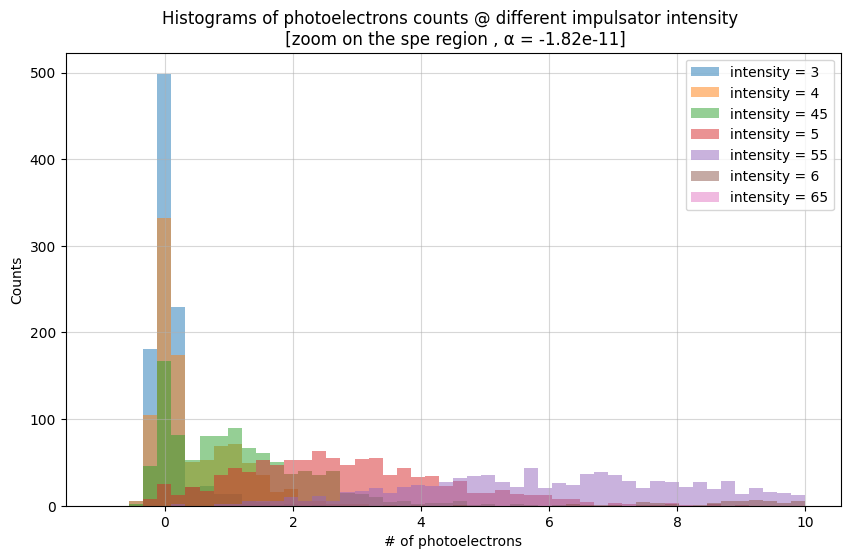

In [8]:
print(f'a \t Mean noise \t RMS_noise \t Mean charge \t RMS_charge \t Real charge \t RMS_rc \t alpha \t\t mean # of pe')
x = [3, 4, 45, 5, 55, 6, 65] #
alpha_mean = 0
charges = {}

plt.figure(figsize=(10,6), dpi=100)
plt.xlabel('# of photoelectrons')
plt.ylabel('Counts')
plt.grid(alpha=.5)

# loop over dataset
for a in x:

    # t and v reset to store the waveform mean value
    t = np.zeros(len(t_imp[0]))
    v = np.zeros(len(t_imp[0]))

    # loop over files 
    for i,filename in enumerate(files[a]):
        f = open(paths[a]+filename, 'rb')
        data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                      # we can't go further than the "WaveArrayCount"
        t_imp[i] = data.x
        v_imp[i] = data.y

    # charge noise and delta inizialization
    charge = np.zeros(len(files[a]))
    noise = np.zeros(len(files[a]))
    delta = (np.max(t_imp[0]) - np.min(t_imp[0]))/len(t_imp[0])

    # waveform's mean, integral (charge), and noise computation 
    for i in range(len(t_imp[:,0])):
        t += t_imp[i]/len(t_imp[:,0])
        v += v_imp[i]/len(t_imp[:,0])
        charge[i] = np.sum(v_imp[i,325:400])*delta
        noise[i] = np.sum(v_imp[i,100:175])*delta

    # computation of mean values (w/ relative RMS) and mean alpha to be printed
    mean_noise= np.mean(noise)
    RMS_noise = np.std(noise)

    mean_charge = np.mean(charge)
    RMS_charge = np.std(charge)
    
    real_charge = mean_charge-mean_noise
    real_charge_RMS_squared = RMS_charge*RMS_charge - RMS_noise*RMS_noise

    alpha = real_charge_RMS_squared/real_charge
    alpha_mean += alpha/len(x)

    # mean number of photoelectrons in the various samples
    mean_npe = real_charge/alpha

    # data plot w/ legend: histogram of cleaned (aka no noise) mean charge 
    # at different impulsator intensity, divided by the mean alpha (a posteriori), aka the spe charge
    charges[str(a)] = (-charge+mean_noise)/(1.8227545404250894e-11)
    plt.hist(charges[str(a)], bins=50, label=f'intensity = {a}', alpha=.5, range=(-1,10), histtype='stepfilled', lw=2)
    plt.legend()

    # info print
    print(f'{a} \t {mean_noise:.2e} \t {RMS_noise:.2e} \t {mean_charge:.2e} \t {RMS_charge:.2e} \t {(real_charge):.2e} \t {np.sqrt(real_charge_RMS_squared):.2e} \t {alpha:.2e} \t {mean_npe:.2f}') 

print(f'mean alpha value: {alpha_mean:.2e}')
plt.title(f'Histograms of photoelectrons counts @ different impulsator intensity \n [zoom on the spe region , α = {alpha_mean:.2e}]');

a 	 Mean noise 	 RMS_noise 	 Mean charge 	 RMS_charge 	 real charge 	 real RMS 	 alpha
3 	 9.79e-12 	 2.50e-12 	 8.51e-12 	 5.38e-12 	 -1.28e-12 	 4.76e-12 	 -1.77e-11
4 	 1.00e-11 	 2.75e-12 	 2.14e-12 	 1.18e-11 	 -7.87e-12 	 1.14e-11 	 -1.66e-11
45 	 9.28e-12 	 2.79e-12 	 -1.10e-11 	 1.95e-11 	 -2.03e-11 	 1.93e-11 	 -1.83e-11
5 	 8.83e-12 	 2.52e-12 	 -4.21e-11 	 2.94e-11 	 -5.09e-11 	 2.93e-11 	 -1.68e-11
55 	 9.01e-12 	 2.68e-12 	 -1.13e-10 	 4.97e-11 	 -1.22e-10 	 4.97e-11 	 -2.02e-11
6 	 9.29e-12 	 2.73e-12 	 -2.95e-10 	 7.80e-11 	 -3.05e-10 	 7.79e-11 	 -1.99e-11
65 	 9.64e-12 	 2.67e-12 	 -7.34e-10 	 1.16e-10 	 -7.44e-10 	 1.16e-10 	 -1.80e-11


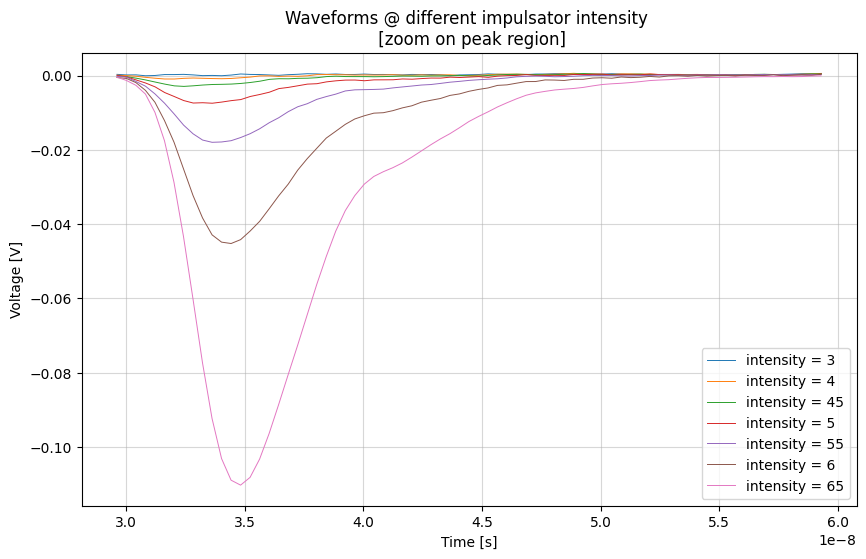

In [ ]:
print(f'a \t Mean noise \t RMS_noise \t Mean charge \t RMS_charge \t real charge \t real RMS \t alpha')
x = [3, 4, 45, 5, 55, 6, 65]
alpha_c = 0

plt.figure(figsize=(10,6), dpi=100)
plt.title(f'Waveforms @ different impulsator intensity \n [zoom on peak region]')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid(alpha=.5)

# loop over dataset
for a in x:

    # t and v reset to store the waveform mean value
    t = np.zeros(len(t_imp[0]))
    v = np.zeros(len(t_imp[0]))

    # loop over files 
    for i,filename in enumerate(files[a]):
        f = open(paths[a]+filename, 'rb')
        data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                      # we can't go further than the "WaveArrayCount"
        t_imp[i] = data.x
        v_imp[i] = data.y
    
    # charge noise and delta inizialization
    charge = np.zeros(len(t_imp[:,0]))
    noise = np.zeros(len(t_imp[:,0]))
    delta = (np.max(t_imp[0])-np.min(t_imp[0]))/len(t_imp[0])

    # waveform's mean, integral (charge), and noise computation 
    for i in range(len(t_imp[:,0])):
        t+=t_imp[i]/len(t_imp[:,0])
        v+=v_imp[i]/len(t_imp[:,0])
        charge[i] = np.sum(v_imp[i,325:400])*delta
        noise[i] = np.sum(v_imp[i,100:175])*delta
    
    # computation of mean values (w/ relative RMS) and mean alpha to be printed
    mean_noise= np.mean(noise)
    RMS_noise = np.std(noise)

    mean_charge = np.mean(charge)
    RMS_charge = np.std(charge)
    
    real_charge = mean_charge-mean_noise
    real_RMS2 = RMS_charge*RMS_charge - RMS_noise*RMS_noise

    alpha = real_RMS2/real_charge
    alpha_c += alpha/len(x)

    # data plot w/ legend
    plt.plot(t[325:400], v[325:400], '-', linewidth=.7, markersize=1, label=f'intensity = {a}')
    plt.legend()

    # info print
    print(f'{a} \t {mean_noise:.2e} \t {RMS_noise:.2e} \t {mean_charge:.2e} \t {RMS_charge:.2e} \t {(real_charge):.2e} \t {np.sqrt(real_RMS2):.2e} \t {alpha:.2e}') 

## Fitting the charge distribution

First we import what we need

In [9]:
from scipy import optimize as opt
from scipy.special import factorial
from scipy.stats import poisson

Then we define some functions to fit the data

In [45]:
def normal(y, A, mu, sigma):
    return A*np.exp(-(y - mu)**2 / (2 * sigma**2))
param_labels_normal=['A', 'mu', 'sigma']

def norm(y, mu):
    return np.exp(-(y - mu)**2 / (2 * .3**2)) #.148 is extracted from the fit of the gaussian peak in 0
#param_labels=['A', 'mu', 'sigma']


def normal_conv(y, *Amp): # special thanks to StackOverflow for this one <3 
                          # [https://stackoverflow.com/questions/55132107/scipy-fitting-with-parameters-in-a-vector] 
    conv = sum(amp*norm(y, i+1) for i, amp in enumerate(Amp))
    return conv

def normal_conv2(y, *Amp): # questa serve a fittare il plot ad intensità = 6, è il modo più facile che ho trovato
    conv = sum(amp*norm(y, i+6) for i, amp in enumerate(Amp))
    return conv

def poissonian(k, lam, Amp): 
    return (Amp* lam**k / factorial(k)* np.exp(-lam))
param_labels_pois = ['λ', 'Amplitude']

def gaussoniana(y, sigma, lam, A):
    gaussoniana = 0
    for i in range(1,10):
      gaussoniana += A*normal(y, 1, i, sigma)*poissonian(i,lam, 1)
    return gaussoniana


In [42]:
Amp = ['A', 'B']
sigma = ['C', 'D']
for i, amp in enumerate(zip(Amp, sigma)):
  print(i ,amp[0], amp[1])

0 A C
1 B D


We fit the gaussian peak in 0, which will give us an estimation of the dispersion of the single (multiple) photoelectron(s)' distributions 

[2.51506429e+00 8.94183228e-04 1.47971525e-01]


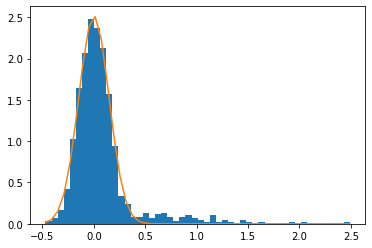

In [11]:
bin_heights, bin_borders, _ = plt.hist(charges['3'], bins=50, histtype='stepfilled', lw=2, density=True)
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
pars, pars_cov = opt.curve_fit(normal, bin_centers, bin_heights)
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1])
plt.plot(x_interval_for_fit, normal(x_interval_for_fit, *pars))
print(pars)

Fixing the sigma of the gaussians in `norm()` , we fit the data with a convolution of gaussians, namely `normal_conv()`, each one respectively centered in 1, 2, 3, etc. (*NOTE: the peak in 0 has been excluded by the fit, since it represent the noise counts distribution*) \\
Then we fit the **convolution** with a **poissonian**, in order to show the actual shape of the data resembles this distribution.


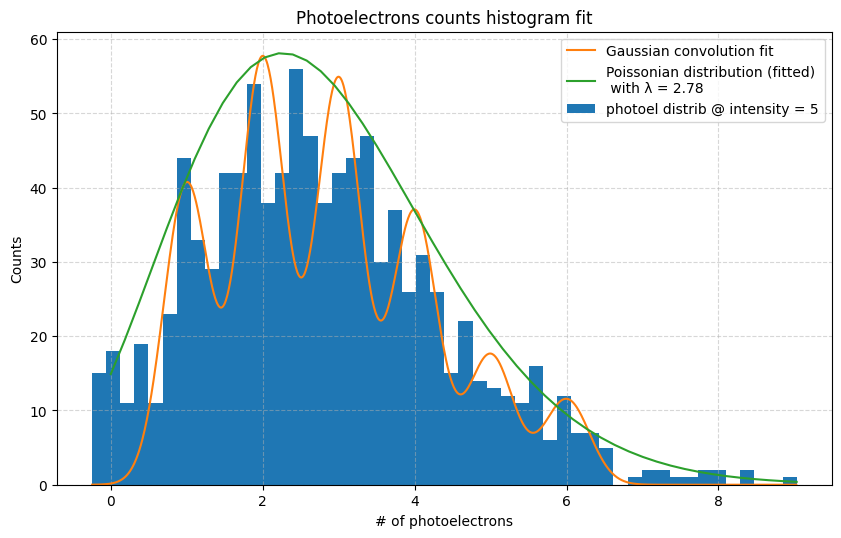

In [46]:
a = '5' # change this to see other plots
# NOTA: per 6 e 6.5 va fatto ancora qualche magheggio, perché l'istogramma non ha picchi per n < 5, ergo curve_fit sfaciola, non avendo come bias un vettore pieno di 1
        # il magheggio che funziona per a = '6' è usare la funzione normal_conv2() per il fit, shiftando i valori di x_for_pois (riga 22) di 5, in modo da far fare il 
        # fit della poissoniana nella stessa "zona d'azione" della convoluzione. Suppongo si possa adattare anche ad a='65' seguendo la stessa logica.

bias = {'4': 3, '45': 5, '5': 6, '55': 14, '6': 22, '65': 40} # this is needed in order to give the length of the amplitude array in the fit function

plt.figure(figsize=(10,6), dpi=100)
plt.title('Photoelectrons counts histogram fit')
plt.xlabel('# of photoelectrons')
plt.ylabel('Counts')
plt.grid(ls='--', alpha=.5)

# histogram plot and computation of bins' centers
bin_heights, bin_borders, _ = plt.hist(charges[a], bins=50, histtype='stepfilled', lw=2, label=f'photoel distrib @ intensity = {a}')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

# fitting the gaussian convolution
pars_norm, pars_norm_cov = opt.curve_fit(normal_conv, bin_centers, bin_heights, p0=np.ones(bias[a])) # here is where we use the bias


# poissonian fit of the gaussian convolution, to prove that the shape is modulated by a poissonian distribution
x_for_pois = np.arange(1, 1+len(pars_norm))# +5 #if using normal_conv2() to fit a = '6'
pars_pois, pars_cov_pois = opt.curve_fit(poissonian, x_for_pois, pars_norm)
pars_normal, pars_cov_normal = opt.curve_fit(normal, bin_centers, bin_heights)


# plot of the fitted distributions over the first histogram
x=np.arange(bin_borders[0],bin_borders[-1], 0.01)
y=np.linspace(0,bin_borders[-1])
plt.plot(x, normal_conv(x, *pars_norm),label=f'Gaussian convolution fit')
plt.plot(y, poissonian(y, *pars_pois),label=f'Poissonian distribution (fitted) \n with {param_labels_pois[0]} = {pars_pois[0]:.2f}')
#plt.plot(y, normal(y, *pars_normal),label=f'Normal distribution (fitted)')
plt.legend();